# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = soup.find("table", class_="table")

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
temp_data = []
rows = table.find_all('tr', class_="data-row")

# Loop through the scraped data to create a list of rows
for row in rows:
    cells = row.find_all("td")
    row_data = [cell.text.strip() for cell in cells]
    temp_data.append(row_data)
    

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
columns = ['id', 'terrestrial_date', 'sol',	'ls', 'month', 'min_temp', 'pressure']
df = pd.DataFrame(temp_data, columns=columns)

In [8]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
pd.DataFrame(df.dtypes, columns=['Data Type'])

,Data Type
id,object
terrestrial_date,object
sol,object
ls,object
month,object
min_temp,object
pressure,object


In [10]:
# Change data types for data analysis
df['id'] = df['id'].astype(int)
df['terrestrial_date'] = df['terrestrial_date'].map(pd.to_datetime)
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)
# df.info()

In [11]:
# Confirm type changes were successful by examining data types again
pd.DataFrame(df.dtypes, columns=['Data Type'])


,Data Type
id,int64
terrestrial_date,datetime64[ns]
sol,int64
ls,int64
month,int64
min_temp,float64
pressure,float64


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
num_of_months = df['month'].nunique()
print(f"There are {num_of_months} months on Mars.")

There are 12 months on Mars.


In [13]:
# 2. How many Martian days' worth of data are there?
# Find the minimum and maximum sols in the dataset
min_sol = df['sol'].min()
max_sol = df['sol'].max()

# Calculate the number of Martian days between the minimum and maximum sols
num_of_sols = max_sol - min_sol

# Calculate the number of Martian days worth of data
martian_days = num_of_sols / 1.027 # 1.027 is the average number of Earth days per Martian day

print(f"There are {martian_days:.2f} Martian days worth of data in the dataset.")


There are 1915.29 Martian days worth of data in the dataset.


In [14]:
# 3. What is the average low temperature by month?
avg_temp_by_month = df.groupby('month')['min_temp'].mean()
avg_temp_by_month


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

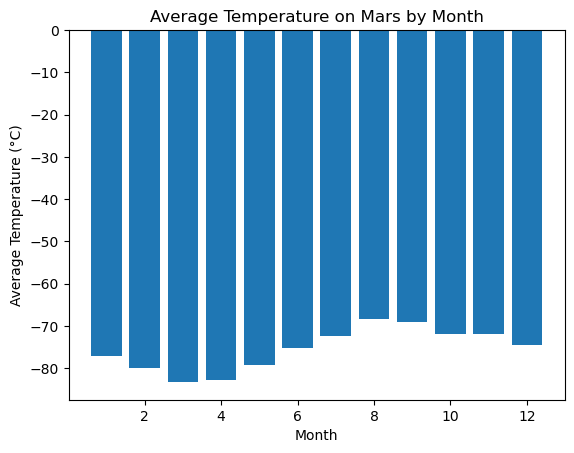

In [15]:
# Plot the average temperature by month
# Create a bar chart
plt.bar(avg_temp_by_month.index, avg_temp_by_month.values)

# Add chart labels and title
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature on Mars by Month')

# Show the plot
plt.show()

In [31]:
# Identify the coldest and hottest months in Curiosity's location
coldest_month = df.sort_values(by='min_temp').iloc[0]
print(coldest_month)

id                                 1119
terrestrial_date    2015-12-09 00:00:00
sol                                1188
ls                                   79
month                                 3
min_temp                          -90.0
pressure                          881.0
Name: 1093, dtype: object


In [32]:
hottest_month = df.sort_values(by='min_temp', ascending=False).iloc[0]
print(hottest_month)

id                                 1614
terrestrial_date    2017-05-10 00:00:00
sol                                1692
ls                                    2
month                                 1
min_temp                          -62.0
pressure                          820.0
Name: 1582, dtype: object


In [37]:
# 4. Average pressure by Martian month
avg_pressure_by_month = df.groupby('month')['pressure'].mean()
avg_pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

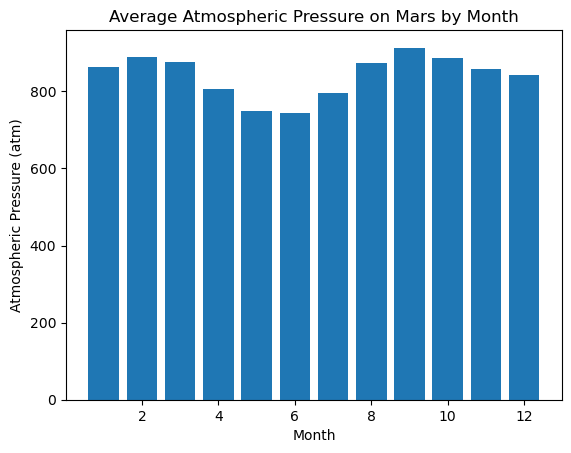

In [41]:
# Plot the average pressure by month
plt.bar(avg_pressure_by_month.index, avg_pressure_by_month.values)

# Add chart labels and title
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure (atm)')
plt.title('Average Atmospheric Pressure on Mars by Month')

# Show the plot
plt.show()


In [42]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Define the length of a Martian year in Earth days
martian_year_earth_days = 687

# Calculate the number of Earth days in a Martian year
earth_days_in_martian_year = martian_year_earth_days * (1 + (1 / 365.25))

print(f"There are approximately {earth_days_in_martian_year:.2f} Earth days in a Martian year.")


There are approximately 688.88 Earth days in a Martian year.


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [43]:
# Write the data to a CSV
df.to_csv('mars_data.csv', index=False)


In [44]:
browser.quit()